### 1 | Introduction

#### 1.1 Background

An echocardiogram uses sound waves to produce an image of the heart. The test enables pulminary doctors to see how the heart is functioning, specifically, the functionailty of the hearts chambers and valves and to detect congenital heart defects before birth. A general echocardiogram may not reveal all the essential information a cardiologist  needs to accurately diagnosis a patient. The type of echocardiogram issued will indicate what information is needed.

A Transthoracic echocardiogram is the standard echocardiogram that obtains a view of the heart by moving a transducer, a small instrument, around different locations of the chest. For more detailed images of the heart, a Transesophageal echocardiogram is used by using a transducer and esophogeal probe to get a clearer image. A Dopple echocardiogram uses sound waves that bounce off the blood cells moving through the heart and blood vessels. This type of echocardiogram determines the speed and direction of the blood flow in your heart. The velocity of the blood flow can be used to pinpoint blood flow problems in the arteries of the heart, which may not be visible from previous echocardiograms.Lastly, a Stress echocardiogram is used to access the stress the ateries have during physical activity. The Stress echocardiogram provides information about the functionailtiy of the coronary artery. The four differing echocardiograms will reveal valuable information for the cardiologist about the health of a patients heart

The aim of this project is to predict and classify if a patient will survive given that they have had a heart attack at least one year prior. Results from an echocardiogram will be analyzed to predict the surivival of a heart attack patient, and classifiy a patient's likelihood of surviving a heart attack. Supervised Learning algortihms that will be used to predict and classifiy a patients survival will be: Logistic Regression, Decision Tree, Random Forest,Naive Bayes,K Nearest Neighbors and Neural Networks. 

#### 1.2 Data Attributes

In the study, 132 patients have suffered from heart attacks in their lifetime. The target variable, indicates whether a patient has survived at least one year following the heart attack. 

The target variable:
 - __Alive:__ is a binary variable that indicates if a patient is alive following the one year survival period.

There are nine predictor variables:
 - __Age at Heart Attack:__ is a numerical value that descibes the age of the patient when the heart attack occured.
 - __Pericardial Effusion:__ a binary variable that indicates the presence of pericardial fluid around the heart.
 - __Fractional Shortening:__ a numerical value that measures the contracility around the heart (lower numbers are increasingly abnormal).
 - __EPSS(E-Point Septal Separation):__ a numerical value that measures the contracility around the heart (larger numbers are increasingly abnormal).
 - __LVDD (Left Ventricular End-Diastolic DImension):__ a numerical value is the measure of the size of the heart end-diastole.
 - __Wall-Motion Score:__ is a numerical value that measures how the segments of the left ventricle are moving.
 - __Wall-Motion Index:__ is a numerical value that is the wall-motion score divided by the number of segments i nthe eft ventricle are seen moving.
 - __Name:__ is a string variable that indicates the name of the patient.
 - __Survival:__ is a numerical value that indicates how many years the patient survived after the heart attack.


### 2 | Data Cleaning and Exploration

In [2]:
#Loading Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelBinarizer

In [3]:
#Loading Dataset
ecg = pd.read_csv("echocardiogram.csv")

#Removing Nonessential Columns
ecg = ecg.drop(["name","group","aliveat1","mult"],axis = 1)
ecg.head()

,survival,alive,age,pericardialeffusion,fractionalshortening,epss,lvdd,wallmotion-score,wallmotion-index
0,11.0,0.0,71.0,0.0,0.260,9.000,4.600,14.0,1.00
1,19.0,0.0,72.0,0.0,0.380,6.000,4.100,14.0,1.70
2,16.0,0.0,55.0,0.0,0.260,4.000,3.420,14.0,1.00
3,57.0,0.0,60.0,0.0,0.253,12.062,4.603,16.0,1.45
4,19.0,1.0,57.0,0.0,0.160,22.000,5.750,18.0,2.25


In [4]:
#Identifying Missing Values in the Columns
ecg.isnull().sum()

survival                 3
alive                    2
age                      7
pericardialeffusion      1
fractionalshortening     9
epss                    16
lvdd                    12
wallmotion-score         5
wallmotion-index         3
dtype: int64

In [5]:
ecg[["survival","alive","age","pericardialeffusion","fractionalshortening","epss","lvdd","wallmotion-score","wallmotion-index"]].mean()

survival                22.182923
alive                    0.328244
age                     62.813722
pericardialeffusion      0.765152
fractionalshortening     0.216734
epss                    12.164769
lvdd                     4.763157
wallmotion-score        14.438125
wallmotion-index         1.378000
dtype: float64

In [6]:
ecg[["survival","alive","age","pericardialeffusion","fractionalshortening","epss","lvdd","wallmotion-score","wallmotion-index"]].median()

survival                23.500
alive                    0.000
age                     62.000
pericardialeffusion      0.000
fractionalshortening     0.205
epss                    11.000
lvdd                     4.650
wallmotion-score        14.000
wallmotion-index         1.216
dtype: float64

In [7]:
#Median Imputation for Missing Values in the Columns
ecg["survival"] = ecg["survival"].fillna(ecg["survival"].median())
ecg["alive"] = ecg["alive"].fillna(ecg["alive"].median())
ecg["age"] = ecg["age"].fillna(ecg["age"].median())
ecg["pericardialeffusion"] = ecg["pericardialeffusion"].fillna(ecg["pericardialeffusion"].median())
ecg["fractionalshortening"] = ecg["fractionalshortening"].fillna(ecg["fractionalshortening"].median())
ecg["epss"] = ecg["epss"].fillna(ecg["epss"].median())
ecg["lvdd"] = ecg["lvdd"].fillna(ecg["lvdd"].median())
ecg["wallmotion-score"] = ecg["wallmotion-score"].fillna(ecg["wallmotion-score"].median())
ecg["wallmotion-index"] = ecg["wallmotion-index"].fillna(ecg["wallmotion-index"].median())

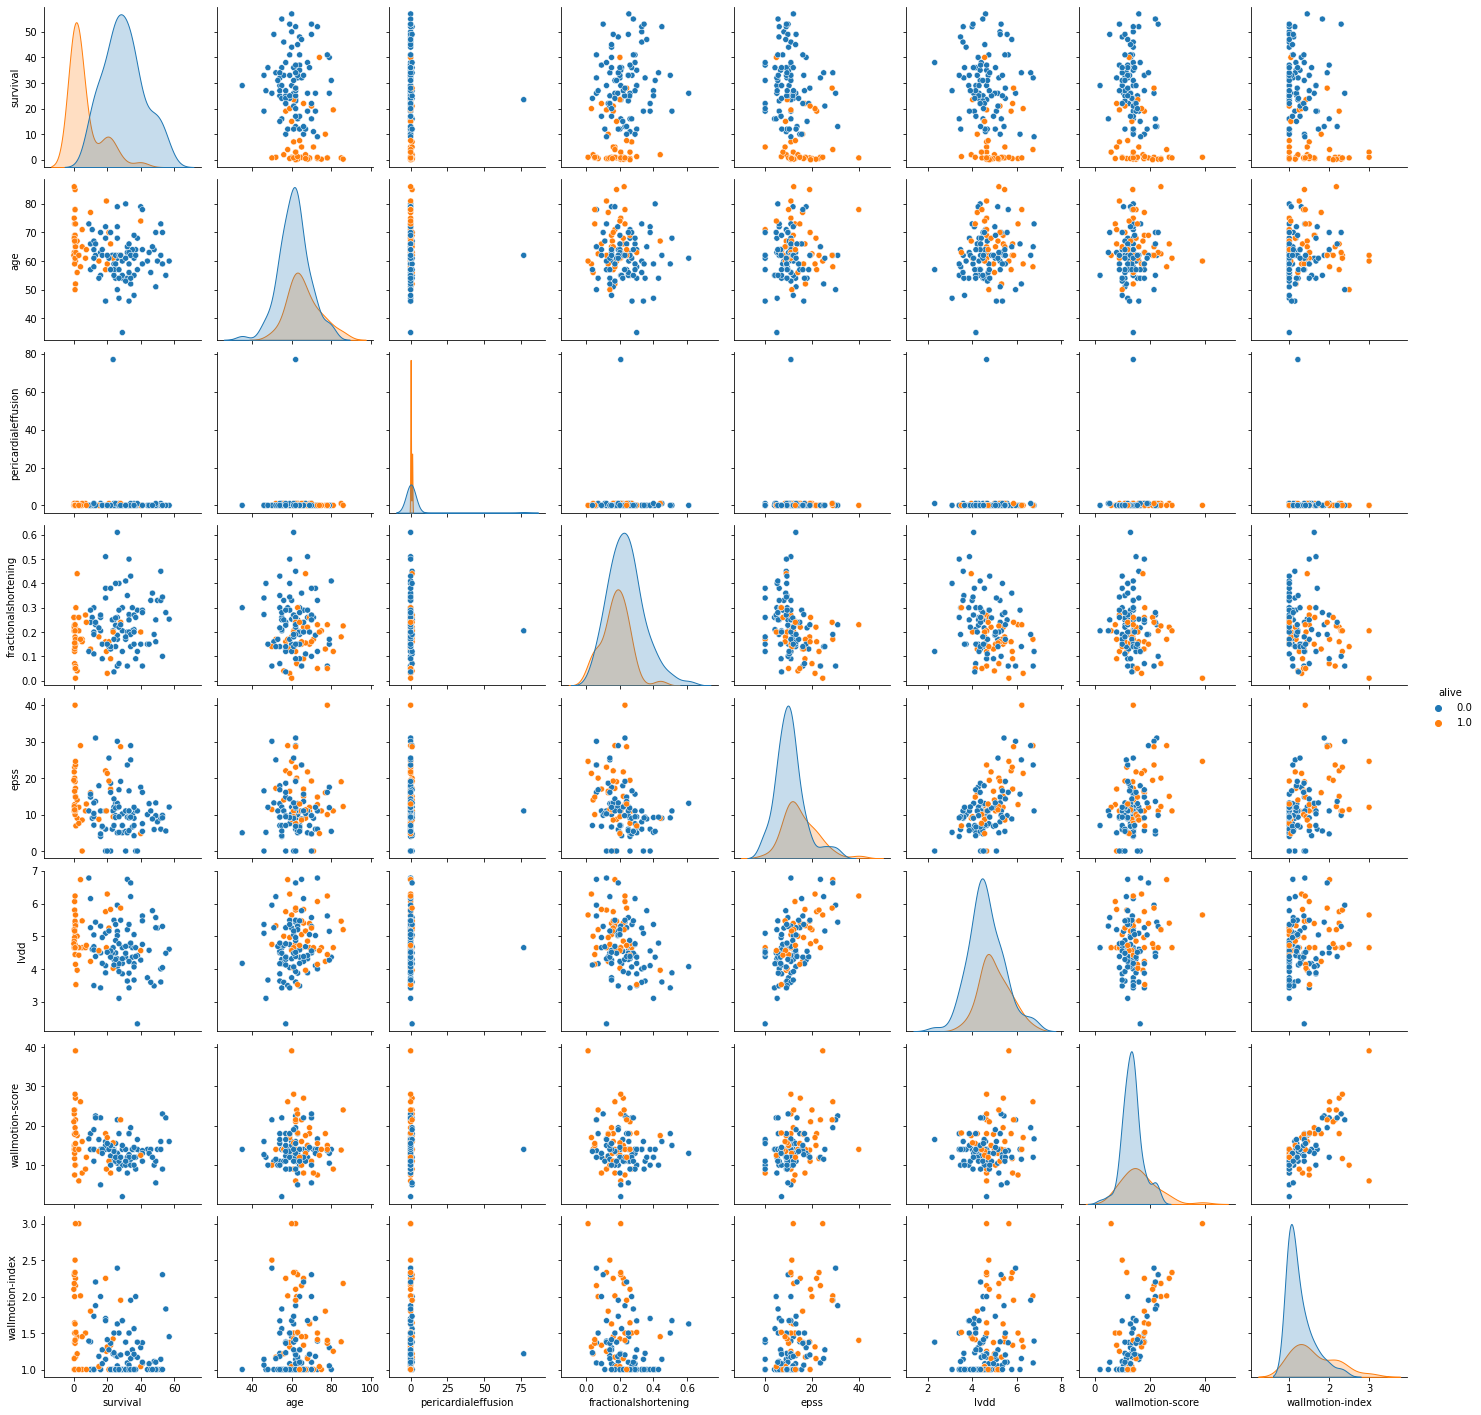

In [19]:
sns.pairplot(ecg,hue = "alive")

### 3 | Logistic Regression

In [8]:
#Loading Libraries
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [9]:
#Feature Variables and Target Variables
X = ecg[["survival","age","pericardialeffusion","fractionalshortening","epss","lvdd","wallmotion-score","wallmotion-index"]]
y = ecg["alive"]

In [10]:
#Split Data into Testing and Training Data
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [11]:
#Model Development and Deployment
lrmodel = LogisticRegression()
lrmodel.fit(X_train,y_train)

y_pred_lr = lrmodel.predict(X_test)

Text(0.5, 15.0, 'Predicted Label')

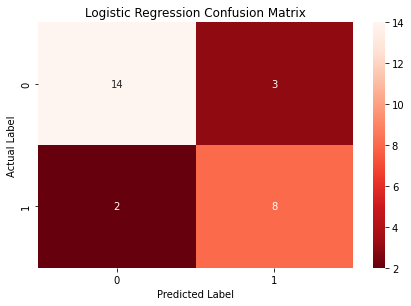

In [19]:
#Confusion Matrix
cnf_matrix_lr = metrics.confusion_matrix(y_test,y_pred_lr)
sns.heatmap(pd.DataFrame(cnf_matrix_lr),annot = True,cmap = "Reds_r")
plt.tight_layout()
plt.title("Logistic Regression Confusion Matrix")
plt.ylabel("Actual Label")
plt.xlabel("Predicted Label")

In [50]:
print("Predictive Model Accuracy Score:",metrics.accuracy_score(y_test,y_pred_lr))
print("Predictive Precision Score",metrics.precision_score(y_test,y_pred_lr))

Predictive Model Accuracy Score: 0.8148148148148148
Predictive Precision Score 0.7272727272727273


### 4 | Decision Tree

In [20]:
#Loading Libraries
#Decision Tree Algorithm
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

#Scale Data
from sklearn.preprocessing import StandardScaler

#Visualization
from sklearn.tree import plot_tree

In [21]:
#Training and Test Data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

#Scaling Data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [30]:
#Decision Tree Analysis
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred_DT = clf.predict(X_test)

accuracy_DT_Pred = metrics.accuracy_score(y_test,y_pred_DT)
precision_DT = metrics.precision_score(y_test,y_pred_DT)
print(f"Decision Tree Predicted Score Accuracy: {accuracy_DT_Pred}")
print(f"Decision Tree Predicted Precision Score: {precision_DT}")

Decision Tree Predicted Score Accuracy: 0.8518518518518519
Decision Tree Predicted Precision Score: 0.8


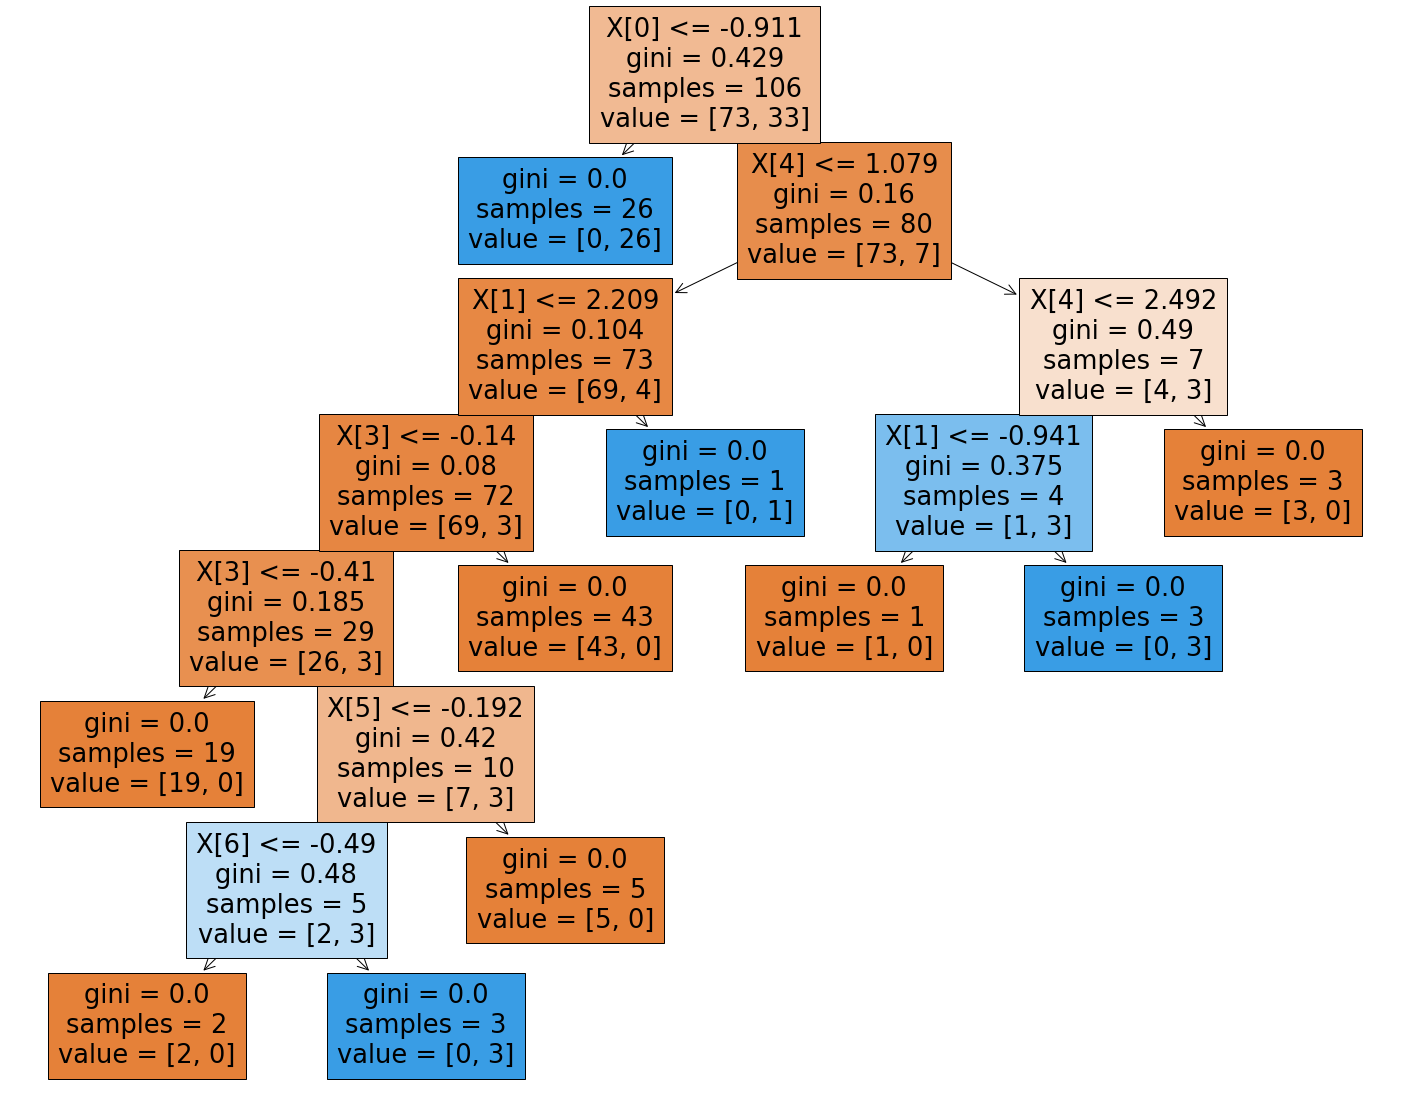

In [31]:
#Decision Tree Visualization
plt.figure(figsize = (25,20))
plot_tree(clf,filled = True)
plt.show()

Text(0.5, 15.0, 'Predicted Label')

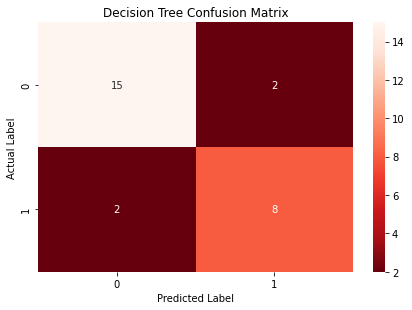

In [32]:
#Confusion Matrix
cnf_matrix_DT = metrics.confusion_matrix(y_test,y_pred_DT)
sns.heatmap(pd.DataFrame(cnf_matrix_DT),annot = True,cmap = "Reds_r")
plt.tight_layout()
plt.title("Decision Tree Confusion Matrix")
plt.ylabel("Actual Label")
plt.xlabel("Predicted Label")

### 5 | Random Forest 

In [45]:
#Loading Libraries
import numpy as np

#Random Forest Algorithm
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

#Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [47]:
#Random Forest Analysis
rfr = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rfr = rfr.fit(X_train,y_train)
y_pred_RF =rfr.predict(X_test)

rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
rf_accuracy = rfc.score(X_test,y_test)
print(f"Random Forest Accuracy: {rf_accuracy}")

Random Forest Accuracy: 0.8888888888888888


In [48]:
#Confusion Matrix
cnf_matrix_RF =confusion_matrix(y_test,y_pred_RF)
sns.heatmap(pd.DataFrame(cnf_matrix_RF),annot = True,cmap = "Reds_r")
plt.tight_layout()
plt.title("Decision Tree Confusion Matrix")
plt.ylabel("Actual Label")
plt.xlabel("Predicted Label")

ValueError: Classification metrics can't handle a mix of binary and continuous targets

### 6 | Naive Bayes

In [49]:
#Loading Libraries
#Naive Bayes Algorithm
from sklearn.naive_bayes import GaussianNB

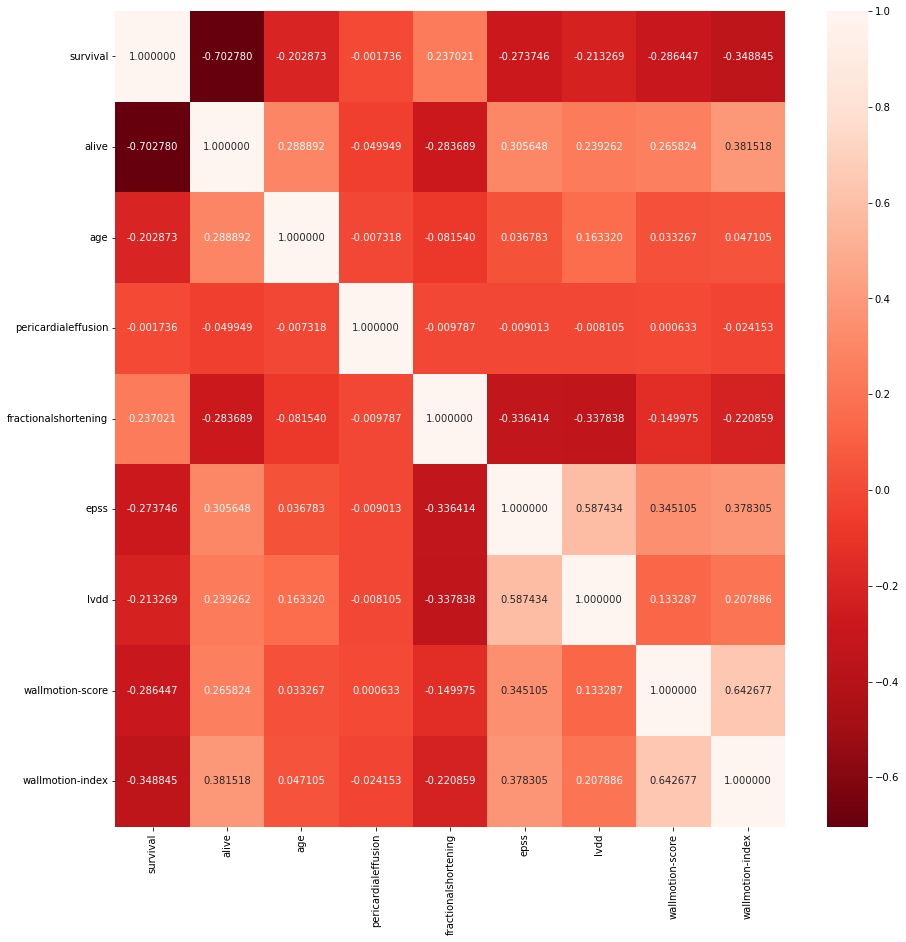

In [51]:
plt.subplots(figsize = (15,15))
sns.heatmap(ecg.corr(),annot = True, fmt = "f",cmap = "Reds_r")
plt.show()

In [52]:
gaussian = GaussianNB()
nb = gaussian.fit(X_train,y_train)
y_pred_NB = gaussian.predict(X_test)

accuracy_nb = metrics.accuracy_score(y_test,y_pred_NB)
print(f"Naive Bayes Accuracy :{accuracy_nb}")

Naive Bayes Accuracy :0.7777777777777778


Text(0.5, 15.0, 'Predicted Label')

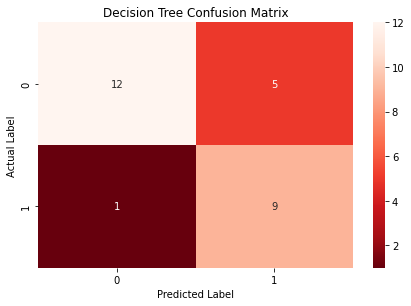

In [53]:
#Confusion Matrix
cnf_matrix_NB =confusion_matrix(y_test,y_pred_NB)
sns.heatmap(pd.DataFrame(cnf_matrix_NB),annot = True,cmap = "Reds_r")
plt.tight_layout()
plt.title("Decision Tree Confusion Matrix")
plt.ylabel("Actual Label")
plt.xlabel("Predicted Label")

### 7 | K Nearest Neighbors

In [54]:
#Loading Libraries
#KNN Algorithm
from sklearn.neighbors import KNeighborsClassifier

#Metrics
from sklearn.model_selection import KFold,train_test_split,cross_val_score
from sklearn.metrics import mean_squared_error
from math import sqrt

In [57]:
#KNN Analysis
knn = KNeighborsClassifier(n_neighbors = 6)
knn.fit(X_train,y_train)
y_pred_KNN = knn.predict(X_test)

accuracy_KNN = metrics.accuracy_score(y_test,y_pred_KNN)
accuracy_KNN_score = knn.score(X_train,y_train)

print(f"The K Nearest Neighbors Predicted Accucary Score: {accuracy_KNN}")
print(f"The K Nearest Neighbors Training Accuracy Score: {accuracy_KNN_score}")

The K Nearest Neighbors Predicted Accucary Score: 0.7037037037037037
The K Nearest Neighbors Training Accuracy Score: 0.8773584905660378


Text(0.5, 15.0, 'Predicted Label')

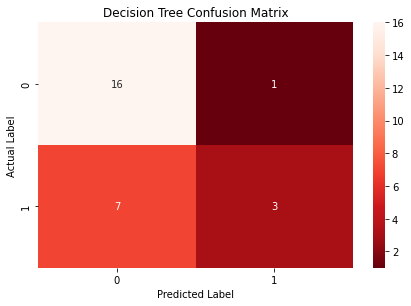

In [58]:
#Confusion Matrix
cnf_matrix_KNN =confusion_matrix(y_test,y_pred_KNN)
sns.heatmap(pd.DataFrame(cnf_matrix_KNN),annot = True,cmap = "Reds_r")
plt.tight_layout()
plt.title("Decision Tree Confusion Matrix")
plt.ylabel("Actual Label")
plt.xlabel("Predicted Label")

### 8 | Keras

In [59]:
#Loading Libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [60]:
#Defining Keras Model
kmodel = Sequential()
kmodel.add(Dense(12,input_shape =(8,), activation = "relu"))
kmodel.add(Dense(8,activation = "relu"))
kmodel.add(Dense(1,activation = "sigmoid"))

2022-08-05 12:11:52.811703: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: SSE4.1 SSE4.2


In [61]:
#Compile Keras Model
kmodel.compile(loss = "binary_crossentropy", optimizer = "adam", metrics =['accuracy'])

In [65]:
#Fitting Keras Model
kmodel.fit(X,y,epochs = 100, batch_size = len(X_train))

Train on 133 samples
Epoch 1/100
133/133 [==============================] - 0s 82us/sample - loss: 0.3037 - accuracy: 0.8872
Epoch 2/100
133/133 [==============================] - 0s 36us/sample - loss: 0.3030 - accuracy: 0.8872
Epoch 3/100
133/133 [==============================] - 0s 30us/sample - loss: 0.3026 - accuracy: 0.8872
Epoch 4/100
133/133 [==============================] - 0s 34us/sample - loss: 0.3020 - accuracy: 0.8872
Epoch 5/100
133/133 [==============================] - 0s 33us/sample - loss: 0.3012 - accuracy: 0.8872
Epoch 6/100
133/133 [==============================] - 0s 30us/sample - loss: 0.3015 - accuracy: 0.8722
Epoch 7/100
133/133 [==============================] - 0s 28us/sample - loss: 0.3012 - accuracy: 0.8647
Epoch 8/100
133/133 [==============================] - 0s 35us/sample - loss: 0.3010 - accuracy: 0.8647
Epoch 9/100
133/133 [==============================] - 0s 48us/sample - loss: 0.3003 - accuracy: 0.8647
Epoch 10/100
133/133 [=====================

133/133 [==============================] - 0s 24us/sample - loss: 0.2800 - accuracy: 0.8647
Epoch 78/100
133/133 [==============================] - 0s 30us/sample - loss: 0.2805 - accuracy: 0.8647
Epoch 79/100
133/133 [==============================] - 0s 21us/sample - loss: 0.2817 - accuracy: 0.8647
Epoch 80/100
133/133 [==============================] - 0s 29us/sample - loss: 0.2818 - accuracy: 0.8647
Epoch 81/100
133/133 [==============================] - 0s 33us/sample - loss: 0.2814 - accuracy: 0.8647
Epoch 82/100
133/133 [==============================] - 0s 32us/sample - loss: 0.2804 - accuracy: 0.8647
Epoch 83/100
133/133 [==============================] - 0s 29us/sample - loss: 0.2783 - accuracy: 0.8647
Epoch 84/100
133/133 [==============================] - 0s 27us/sample - loss: 0.2785 - accuracy: 0.8797
Epoch 85/100
133/133 [==============================] - 0s 28us/sample - loss: 0.2816 - accuracy: 0.8947
Epoch 86/100
133/133 [==============================] - 0s 27us/samp

In [66]:
#Evaluating Keras Model
_, keras_accuracy = kmodel.evaluate(X,y)
print(f"Keras Predicted Model Accuracy:{keras_accuracy}")

133/133 [==============================] - 0s 77us/sample - loss: 0.2754 - accuracy: 0.8797
Keras Predicted Model Accuracy:0.8796992301940918


### 9 | Tensorflow

In [67]:
#Loading Libraries
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

In [68]:
#Rescaling 
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
X_test_scaled = scaler.fit_transform(X_test.astype(np.float64))

In [70]:
#Creating Feature Tensor
feature_columns = [tf.feature_column.numeric_column('x',shape = X_train_scaled.shape[1:])]

### 10 | Conclusion

Text(0.5, 1.0, 'Model Accuracy')

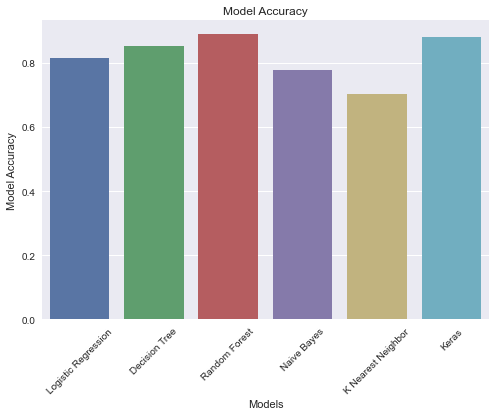

In [75]:
plt.style.use("seaborn")

x = ["Logistic Regression","Decision Tree", "Random Forest", "Naive Bayes", "K Nearest Neighbor","Keras"]
y = [metrics.accuracy_score(y_test,y_pred_lr),accuracy_DT_Pred,rf_accuracy,accuracy_nb,accuracy_KNN,keras_accuracy]

sns.barplot(x=x, y=y)
plt.ylabel("Model Accuracy")
plt.xlabel("Models")
plt.xticks(rotation = 45)
plt.title("Model Accuracy")